In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
import sklearn
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from pprint import pprint as pp
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
import tensorflow.keras as keras
from IPython.display import display
#plt.style.use('fivethirtyeight')
#%matplotlib inline


import warnings
warnings.filterwarnings("ignore") 

In [107]:
df = pd.read_csv("DataCarrardetal.2022MedTeach.csv")

In [108]:
df.shape

(886, 20)

In [109]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [110]:
df.isna().sum()

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [111]:
df.describe().round(2)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00,886.00
mean,889.71,22.38,3.10,1.70,14.33,0.56,0.35,25.29,3.78,0.22,106.37,58.53,34.78,23.15,0.72,18.05,42.90,16.88,10.08,24.21
std,515.56,3.30,1.76,0.47,32.37,0.50,0.48,15.93,1.06,0.42,8.78,6.57,5.38,4.99,0.09,11.48,11.98,5.26,4.59,4.63
min,2.00,17.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,67.00,37.00,18.00,6.00,0.36,0.00,20.00,5.00,4.00,10.00
25%,447.50,20.00,1.00,1.00,1.00,0.00,0.00,12.00,3.00,0.00,101.00,54.00,31.00,20.00,0.67,9.00,34.00,13.00,6.00,21.00
50%,876.00,22.00,3.00,2.00,1.00,1.00,0.00,25.00,4.00,0.00,107.00,58.00,35.00,23.00,0.73,16.00,43.00,17.00,9.00,24.00
75%,1341.75,24.00,5.00,2.00,1.00,1.00,1.00,36.00,5.00,0.00,113.00,63.00,39.00,26.75,0.79,25.00,51.00,20.00,13.00,28.00
max,1790.00,49.00,6.00,3.00,121.00,1.00,1.00,70.00,5.00,1.00,125.00,76.00,48.00,35.00,0.95,56.00,77.00,30.00,24.00,36.00


In [112]:
# There were very few samples outside of male and female in the dataset
# so I decided to take them out of for the regression.

mask = df['sex'] < 3
df= df[mask]

In [113]:
df.shape

(881, 20)

In [114]:
df.describe()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.00000,881.000000,881.000000,881.000000
mean,890.965948,22.372304,3.095346,1.687855,14.231555,0.566402,0.348468,25.373439,3.780931,0.224745,106.331442,58.511918,34.765040,23.147560,0.719934,18.066969,42.91714,16.883087,10.065834,24.230420
std,515.637127,3.299429,1.760679,0.463632,32.306676,0.495853,0.476756,15.923330,1.058901,0.417651,8.764548,6.581838,5.372316,4.983019,0.093371,11.473341,11.97853,5.242848,4.576395,4.608567
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.00000,5.000000,4.000000,10.000000
25%,449.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.00000,13.000000,6.000000,21.000000
50%,877.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.714286,16.000000,43.00000,17.000000,9.000000,24.000000
75%,1343.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.000000,0.785714,25.000000,51.00000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,2.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.00000,30.000000,24.000000,36.000000


In [115]:
# I chose to split the data based the school year section. df_B is the classroom years while df_M is the clinical years.
df_B = df[df['year'] <=3]
df_M = df[df['year'] > 3]

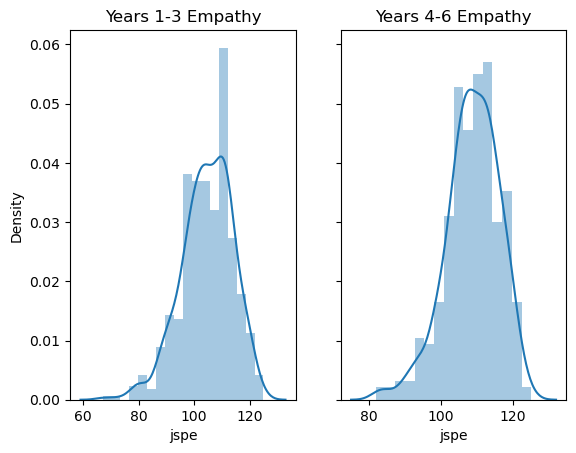

<Figure size 800x800 with 0 Axes>

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (8,8))
b = sns.distplot(df_B['jspe'], ax = ax1)
m = sns.distplot(df_M['jspe'], ax = ax2)
ax1.set_title('Years 1-3 Empathy')
ax2.set_title('Years 4-6 Empathy')
plt.show()

Text(0.5, 1.0, 'Health Satisfaction Ratings')

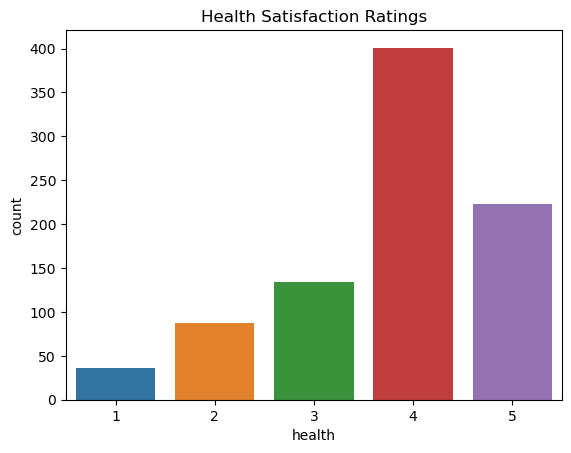

In [117]:
sns.countplot(x="health", data =df).set_title("Health Satisfaction Ratings")

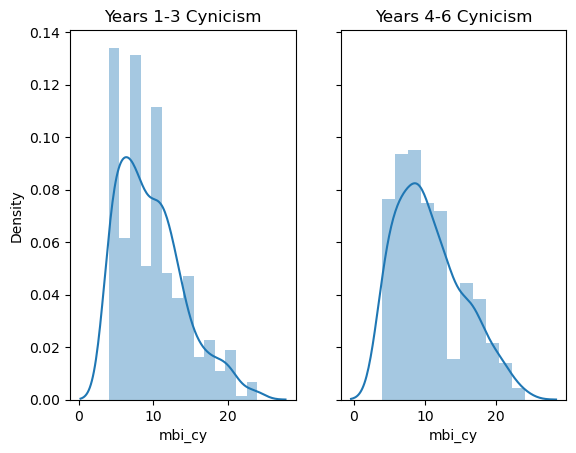

<Figure size 500x500 with 0 Axes>

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (5,5))
b = sns.distplot(df_B['mbi_cy'], ax = ax1)
m = sns.distplot(df_M['mbi_cy'], ax = ax2)
ax1.set_title('Years 1-3 Cynicism')
ax2.set_title('Years 4-6 Cynicism')
plt.show()

#### Scores between 6 and 11 inclusive indicate a moderate level of burn out in regards to cynicism. Higher scores in this test could indicate how the medical students feel about their patients.

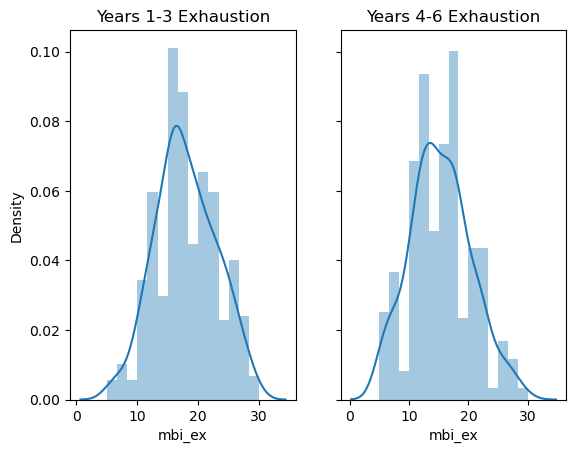

<Figure size 500x500 with 0 Axes>

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (5,5))
b = sns.distplot(df_B['mbi_ex'], ax = ax1)
m = sns.distplot(df_M['mbi_ex'], ax = ax2)
ax1.set_title('Years 1-3 Exhaustion')
ax2.set_title('Years 4-6 Exhaustion')
plt.show()

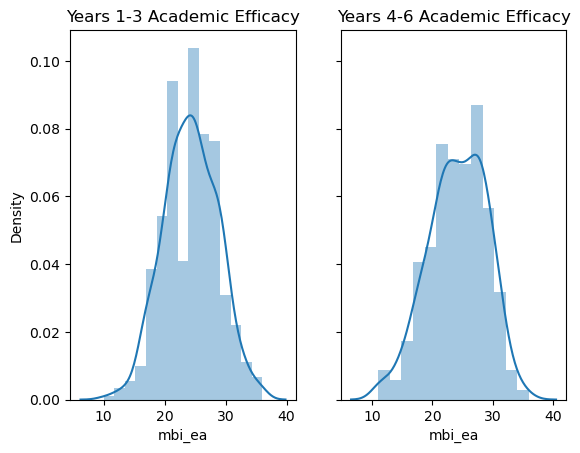

<Figure size 1000x1000 with 0 Axes>

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (10,10))
b = sns.distplot(df_B['mbi_ea'], ax = ax1)
m = sns.distplot(df_M['mbi_ea'], ax = ax2)
ax1.set_title('Years 1-3 Academic Efficacy')
ax2.set_title('Years 4-6 Academic Efficacy')
plt.show()

#### This distribution puts a majority of scores between 20 and 30 which according to the test, indicates a High level of burnout. 40 or above indicates a low level of burnout.

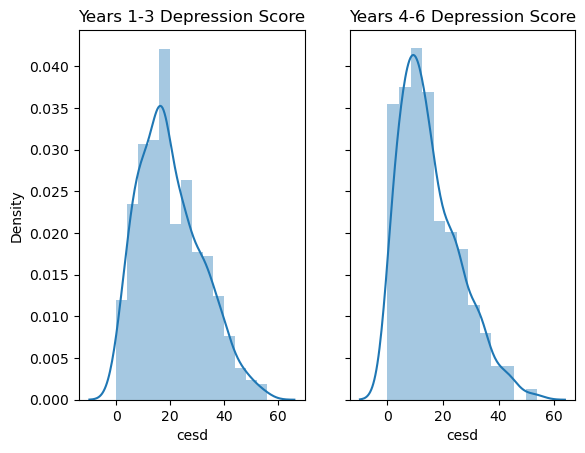

<Figure size 500x500 with 0 Axes>

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.figure(figsize = (5,5))
b = sns.distplot(df_B['cesd'], ax = ax1)
m = sns.distplot(df_M['cesd'], ax = ax2)
ax1.set_title('Years 1-3 Depression Score')
ax2.set_title('Years 4-6 Depression Score')
plt.show()

#### The CES-D stands for Center for Epidemiologic Studies Depression Scale and higher scores up to 60 could indicate symptomology of depression.

<AxesSubplot: >

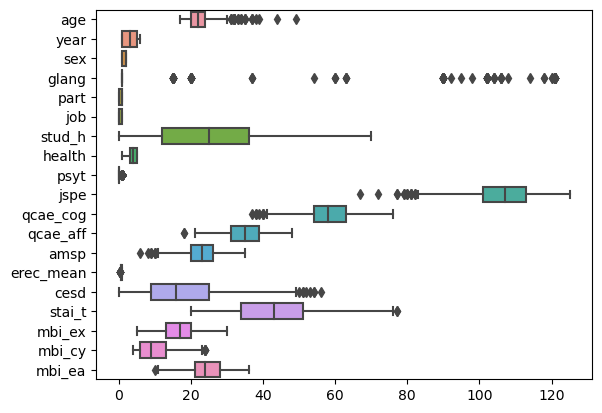

In [122]:
sns.boxplot(data=df.drop("id", axis=1), orient="h")

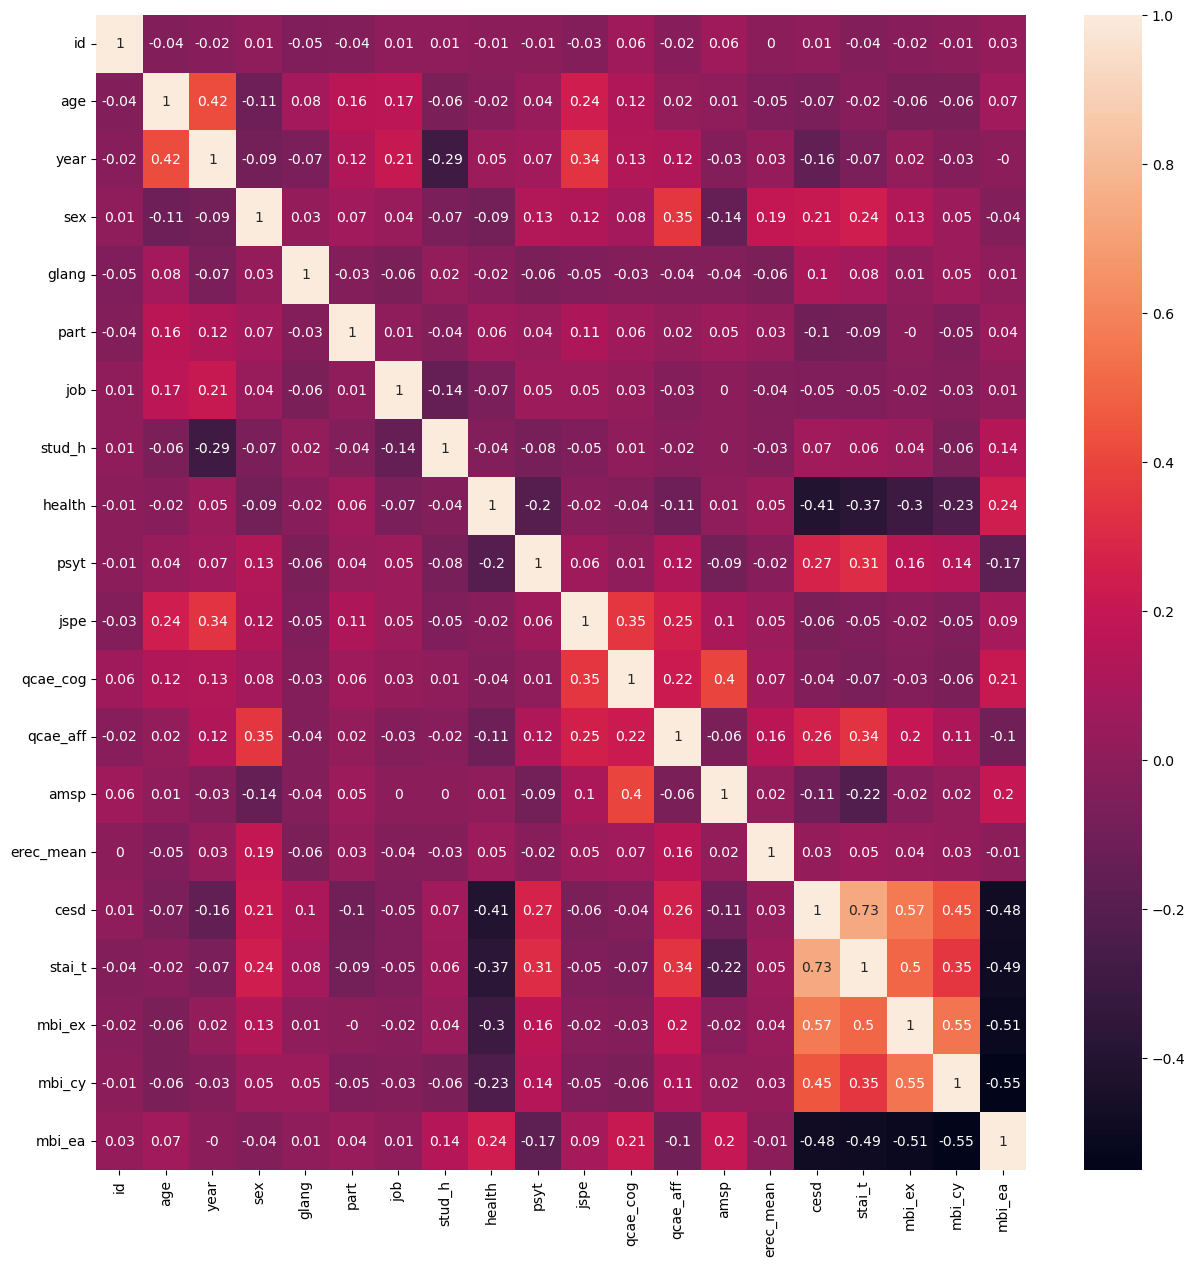

In [123]:
fig = plt.figure(figsize= (15,15))
sns.heatmap(df_B.corr().round(2), annot=True)
plt.show()

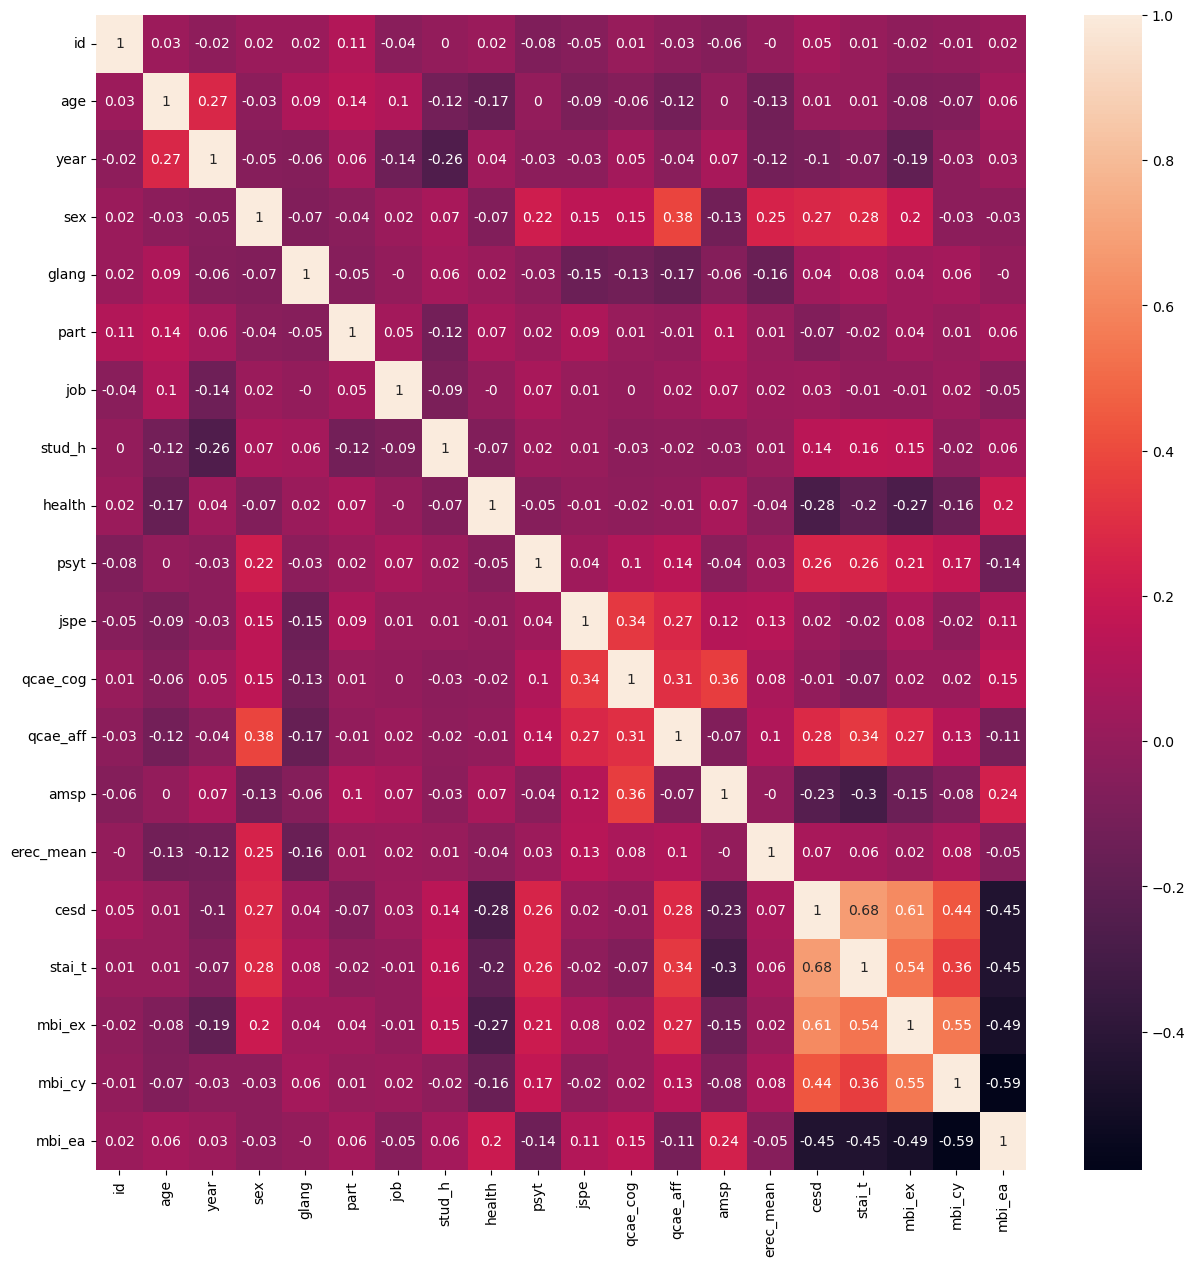

In [124]:
fig = plt.figure(figsize= (15,15))
sns.heatmap(df_M.corr().round(2), annot=True)
plt.show()

Text(0.5, 1.0, 'Years 4-6')

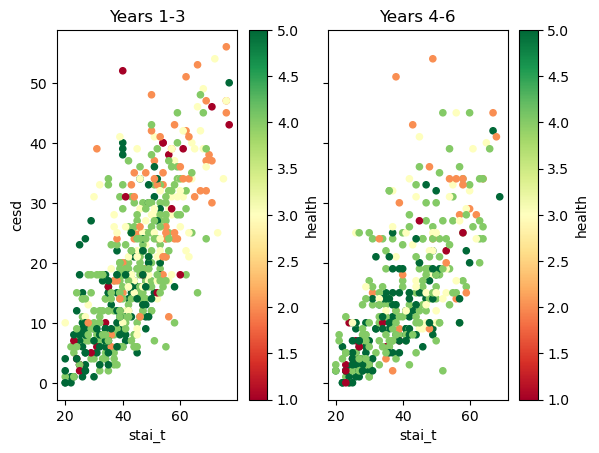

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
df_B.plot(kind='scatter',
                   x='stai_t',
                   y='cesd',
                   c='health',
                   cmap='RdYlGn',
                   ax=ax1)
df_M.plot(kind='scatter',
                   x='stai_t',
                   y='cesd',
                   c='health',
                   cmap='RdYlGn',
                   ax=ax2)
ax1.set_title('Years 1-3')
ax2.set_title('Years 4-6')

#### Higher STAI score indicate higher levels of anxiety while CES-D scores from 15-21 indicate moderate depression and above 21 indicate sever depression.

#### There seems to be a trend of more health satisifactions with lower scores on both of those tests

Text(0.5, 1.0, 'Years 4-6')

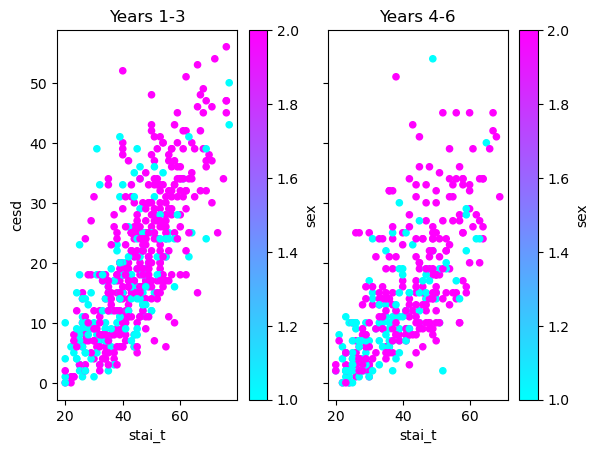

In [126]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
df_B.plot(kind='scatter',
                   x='stai_t',
                   y='cesd',
                   c='sex',
                   cmap=plt.cm.cool,
                   ax=ax1)
df_M.plot(kind='scatter',
                   x='stai_t',
                   y='cesd',
                   c='sex',
                   cmap=plt.cm.cool,
                   ax=ax2)
ax1.set_title('Years 1-3')
ax2.set_title('Years 4-6')

Text(0.5, 1.0, 'Years 4-6')

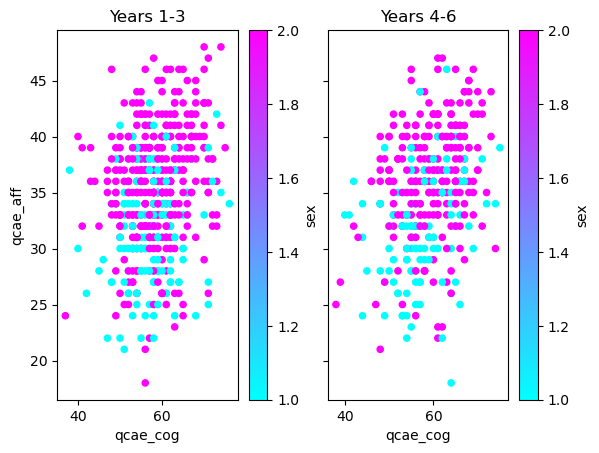

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
df_B.plot(kind='scatter',
                   x='qcae_cog',
                   y='qcae_aff',
                   c='sex',
                   cmap=plt.cm.cool,
                   ax=ax1)
df_M.plot(kind='scatter',
                   x='qcae_cog',
                   y='qcae_aff',
                   c='sex',
                   cmap=plt.cm.cool,
                   ax=ax2)
ax1.set_title('Years 1-3')
ax2.set_title('Years 4-6')

___
___


#### There seems to be a trend of males having lower qcae_cog (cognitive empathy), stai_t (State-Trait Anxiety), cesd (presence of depressive symptoms) scores. While there is also a trend with higher dissatisfaction with health in years 1-3.

___
___
### Regression for School years 1-3

In [128]:
idv = ['qcae_cog', 'stai_t', 'cesd', 'qcae_aff', 'mbi_ex', 'mbi_ea', 'stud_h']
X = df_B[idv]
Y= df_B['sex']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [130]:
logr = LogisticRegression(max_iter = 10000, random_state = 42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print('The accuracy score is:', score)

The accuracy score is: 0.7238095238095238


In [131]:
# I planned on using Logistic regression but wanted to see how other classification models compared.

classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

for c in classifiers:
    c.fit(X_train,y_train)
    print(c.score(X_test,y_test))


0.7238095238095238
0.6952380952380952
0.6857142857142857
0.6761904761904762


In [132]:
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'multi_class': ['auto','ovr', 'multinomial']}

searcher = GridSearchCV(logr, parameters, cv=10)
searcher.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [133]:
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy 0.7412311265969802
Test accuracy of best grid search hypers: 0.7142857142857143


In [134]:
logr = LogisticRegression(multi_class = 'auto', penalty = 'l1',
                        solver = 'liblinear',
                        max_iter = 10000, random_state = 42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print('The accuracy score is:', score)

The accuracy score is: 0.7142857142857143


___
___
### Regression for School years 4-6

In [135]:
idv = ['qcae_cog', 'stai_t', 'cesd', 'qcae_aff', 'mbi_ex', 'mbi_ea', 'stud_h']
X = df_M[idv]
Y= df_M['sex']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [137]:
logr = LogisticRegression(max_iter = 10000, random_state = 42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print('The accuracy score is:', score)

The accuracy score is: 0.7916666666666666


In [138]:
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

for c in classifiers:
    c.fit(X_train,y_train)
    print(c.score(X_test,y_test))

0.7916666666666666
0.7083333333333334
0.8055555555555556
0.7361111111111112


In [139]:
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'multi_class': ['auto','ovr', 'multinomial']}

searcher = GridSearchCV(logr, parameters, cv=10)
searcher.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [140]:
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy 0.7142857142857143
Test accuracy of best grid search hypers: 0.7916666666666666


In [141]:
logr = LogisticRegression(multi_class = 'ovr', penalty = 'l2',
                        solver = 'lbfgs',
                        max_iter = 10000, random_state = 42)
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print('The accuracy score is:', score)

The accuracy score is: 0.7916666666666666


### The regression results show that there is reason to beleive that the independant variables are able to accurately predict the dependant variable within 79% accuracy.

___
___
### Deep Residual Neural Net for years 1-3

In [162]:
idv = ['qcae_cog', 'stai_t', 'cesd', 'qcae_aff', 'mbi_ex', 'mbi_ea', 'stud_h']
X = df_B[idv]
Y= df_B['sex']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [164]:
print(str(X_train.shape))
print(str(y_train.shape))
print(str(X_test.shape))
print(str(y_test.shape))

(417, 7)
(417,)
(105, 7)
(105,)


In [165]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 417 entries, 377 to 165
Series name: sex
Non-Null Count  Dtype
--------------  -----
417 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [166]:
def make_model(n_hidden_layers, n_hidden_units, residual):
    y = x = keras.layers.Input(shape = X_train.shape[1:])
    y = keras.layers.Flatten()(y)
    y = keras.layers.Dense(n_hidden_units)(y)
    y = keras.layers.LayerNormalization()(y)
    for _ in range(n_hidden_layers):
        #y1 = keras.layers.LayerNormalization()(y)
        y_resid = y
        y = keras.layers.Dense(n_hidden_units,
                               activation=keras.activations.relu)(y)
        if(residual):
            y = keras.layers.Add()([y,y_resid])
    y = keras.layers.Dense(3,
                           activation=keras.activations.softmax)(y)
    model = keras.Model(x,y)
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=keras.metrics.SparseCategoricalAccuracy())
    return model

In [167]:
model = make_model(3,1024,True)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 7)]          0           []                               
                                                                                                  
 flatten_10 (Flatten)           (None, 7)            0           ['input_11[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 1024)         8192        ['flatten_10[0][0]']             
                                                                                                  
 layer_normalization_10 (LayerN  (None, 1024)        2048        ['dense_42[0][0]']               
 ormalization)                                                                             

In [168]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=0,
                    batch_size=128,
                    validation_data=(X_test,y_test))
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6695 - sparse_categorical_accuracy: 0.6857


[0.6695000529289246, 0.6857143044471741]

___
___
#### Wide network

In [149]:
model = make_model(1,1024,False)
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=0,
                    batch_size=128,
                    validation_data=(X_test,y_test))
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6456 - sparse_categorical_accuracy: 0.6762


[0.6455767750740051, 0.6761904954910278]

___
___
### Deep Residual Neural Net for years 4-6

In [156]:
idv = ['qcae_cog', 'stai_t', 'cesd', 'qcae_aff', 'mbi_ex', 'mbi_ea', 'stud_h']
X = df_M[idv]
Y= df_M['sex']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [158]:
print(str(X_train.shape))
print(str(y_train.shape))
print(str(X_test.shape))
print(str(y_test.shape))

(287, 7)
(287,)
(72, 7)
(72,)


In [159]:
model = make_model(3,1024,True)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 flatten_8 (Flatten)            (None, 7)            0           ['input_9[0][0]']                
                                                                                                  
 dense_34 (Dense)               (None, 1024)         8192        ['flatten_8[0][0]']              
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 1024)        2048        ['dense_34[0][0]']               
 rmalization)                                                                               

In [160]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=0,
                    batch_size=128,
                    validation_data=(X_test,y_test))
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5654 - sparse_categorical_accuracy: 0.7222


[0.5654212832450867, 0.7222222089767456]

___
___
#### Wide Network

In [161]:
model = make_model(1,1024,False)
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=0,
                    batch_size=128,
                    validation_data=(X_test,y_test))
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6215 - sparse_categorical_accuracy: 0.6667


[0.6215088367462158, 0.6666666865348816]